In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_csv(r"C:\\Users\\tanis\\Downloads\\Final EV data.csv", encoding='latin1')
data.head()

,Vehicle full name,Manufacturing,Model,Top speed (km/hr),Price (INR),Fuel Type,Wheelers type,Battery capacity [kWh],Full charging time (HR),Kerb weight (KG),Range (km/hr),Fast Charging,Drive Type,Number of Seats,boot space (L),Number of Airbags,Type of brakes,Max Torque (N-M),Type of Vehicle
0,Revolt RV400,Revolt Motors,RV400,85.0,134000,Electric,Two wheeler,4.0,4.5,108.0,150.0,YES,Belt Drive,2.0,NaN,NaN,Disc,170.0,Motor cycles
1,Revolt RV300,Revolt Motors,RV300,65.0,"94,999",Electric,Two wheeler,2.7,4.2,101.0,180.0,YES,Hub Drive,2.0,NaN,NaN,Disc,NaN,Motor cycles
2,Tork Motors(Kratos ),Tork Motors,Kratos,100.0,192499,Electric,Two wheeler,4.0,5.0,NaN,180.0,NO,NaN,2.0,NaN,NaN,Disc,28.0,Motor cycles
3,Tork Motors(Kratos R),Tork Motors,Kratos R,105.0,207499,Electric,Two wheeler,4.0,5.0,NaN,180.0,YES,NaN,2.0,NaN,NaN,Disc,38.0,Motor cycles
4,Oben Rorr,Kabira Mobility,Oben Rorr,100.0,102999,Electric,Two wheeler,4.4,2.0,110.0,200.0,YES,Belt Drive,2.0,NaN,NaN,Disc,NaN,Motor cycles


In [19]:
charging_station = pd.read_excel(r"C:\\Users\\tanis\\Downloads\\Book1.xlsx")

charging_station.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [20]:
sales=pd.read_excel(r"C:\\Users\\tanis\\Downloads\\EV_sales.xlsx")
sales.head()

,Years,Two Wheeler,Three Wheeler,Four Wheeler
0,Year 2020,152000,140683,168300
1,Year 2021,143837,88378,134821
2,Year 2022,231338,384215,429217


# DATA PREPROCESSING

In [21]:
data['Wheelers type']=data['Wheelers type'].replace('four wheeler','Four Wheeler')
data['Wheelers type']=data['Wheelers type'].replace('Four Wheeler','Four wheeler')
data['Fast Charging']=data['Fast Charging'].replace('NO','No')
data['Fast Charging']=data['Fast Charging'].replace('YES','Yes')
data['Fuel Type']=data['Fuel Type'].replace('electric','Electric')

In [22]:
def income(price):
    if price <= 100000:
        return 'Low (Thousands)'
    elif price>100000 and price<10000000:
        return 'medium (Lakhs)'
    else:
        return 'High(Crore)'

In [24]:
def income(price):
    price_numeric = pd.to_numeric(price, errors='coerce')  # Convert the value to numeric, handle errors gracefully
    if not pd.isna(price_numeric):
        if price_numeric <= 100000:
            return 'Low (Thousands)'
        elif 100000 < price_numeric < 10000000:
            return 'Medium (Millions)'
        else:
            return 'High (Millions)'
    return 'Unknown'

# Apply the function to the 'Price (INR)' column
data['Income'] = data['Price (INR)'].apply(income)


3. Deals Null values in the dataset by filling them with mean values.

In [29]:
data['Price (INR)'] = pd.to_numeric(data['Price (INR)'], errors='coerce')
data['Price (INR)'] = data['Price (INR)'].fillna(data['Price (INR)'].mean())

In [30]:
data['Type of brakes'].mode()[0]

'disc (front + rear)'

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis.

For analysis, we took some features for visualization from our dataset as shown below:

Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Two Wheeler sales ')

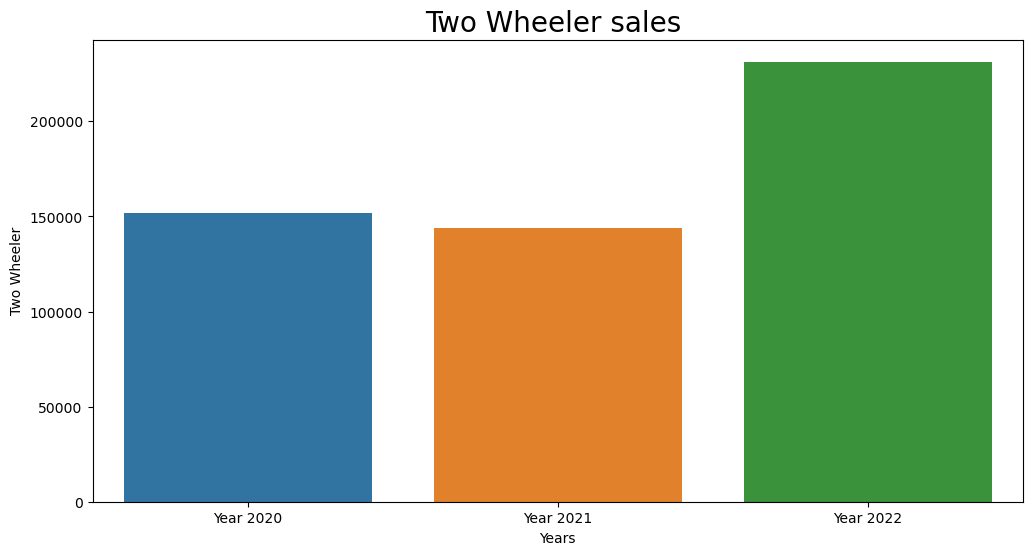

In [31]:
plt.figure(figsize=(12,6))
print(sns.barplot(y=sales['Two Wheeler'],x=sales['Years']))
plt.title('Two Wheeler sales ',fontsize = 20)

Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Three Wheeler sales ')

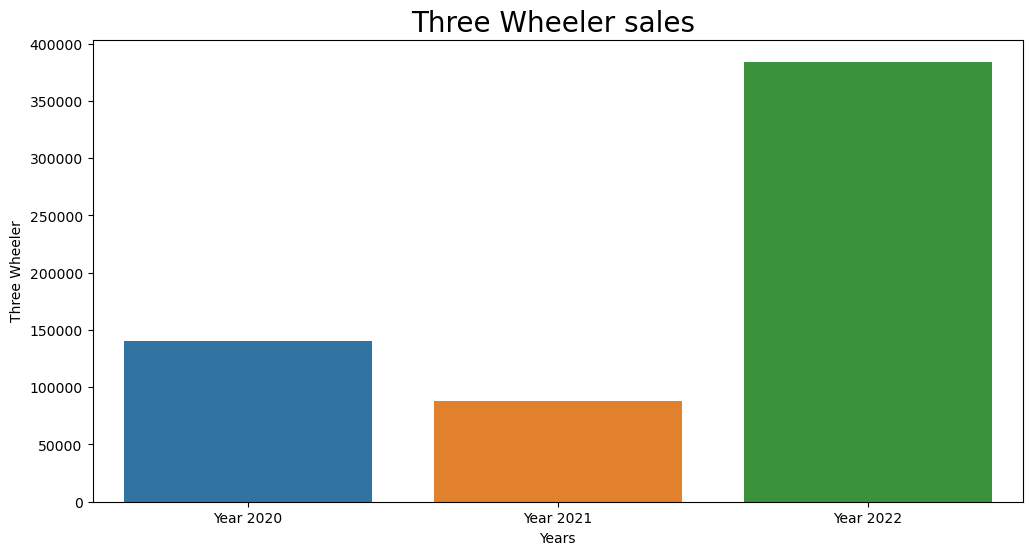

In [32]:
plt.figure(figsize=(12,6))
print(sns.barplot(y=sales['Three Wheeler'],x=sales['Years']))
plt.title('Three Wheeler sales ',fontsize = 20)

Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Four Wheeler sales ')

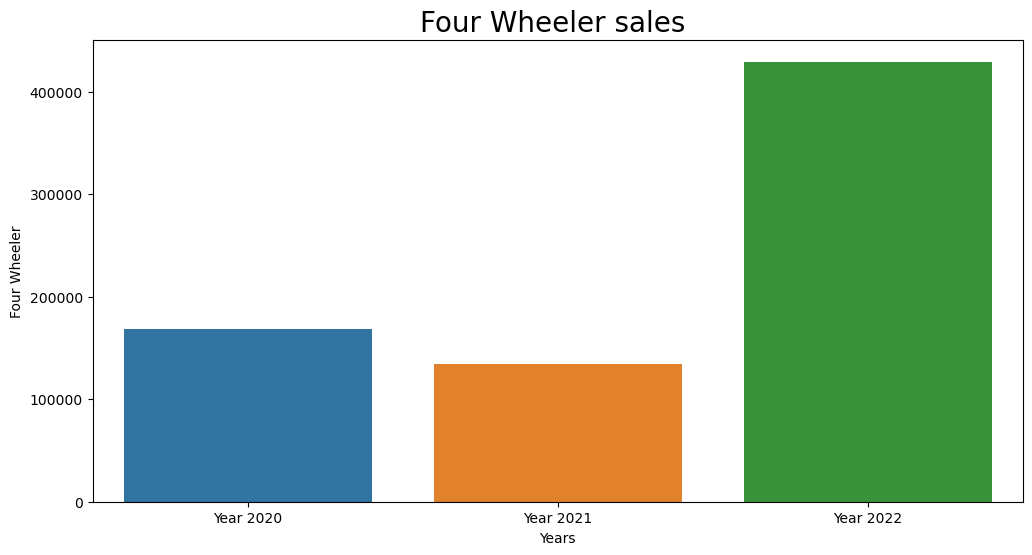

In [33]:
plt.figure(figsize=(12,6))
print(sns.barplot(y=sales['Four Wheeler'],x=sales['Years']))
plt.title('Four Wheeler sales ',fontsize = 20)

Text(0.5, 1.0, 'Charging Sation by State wise')

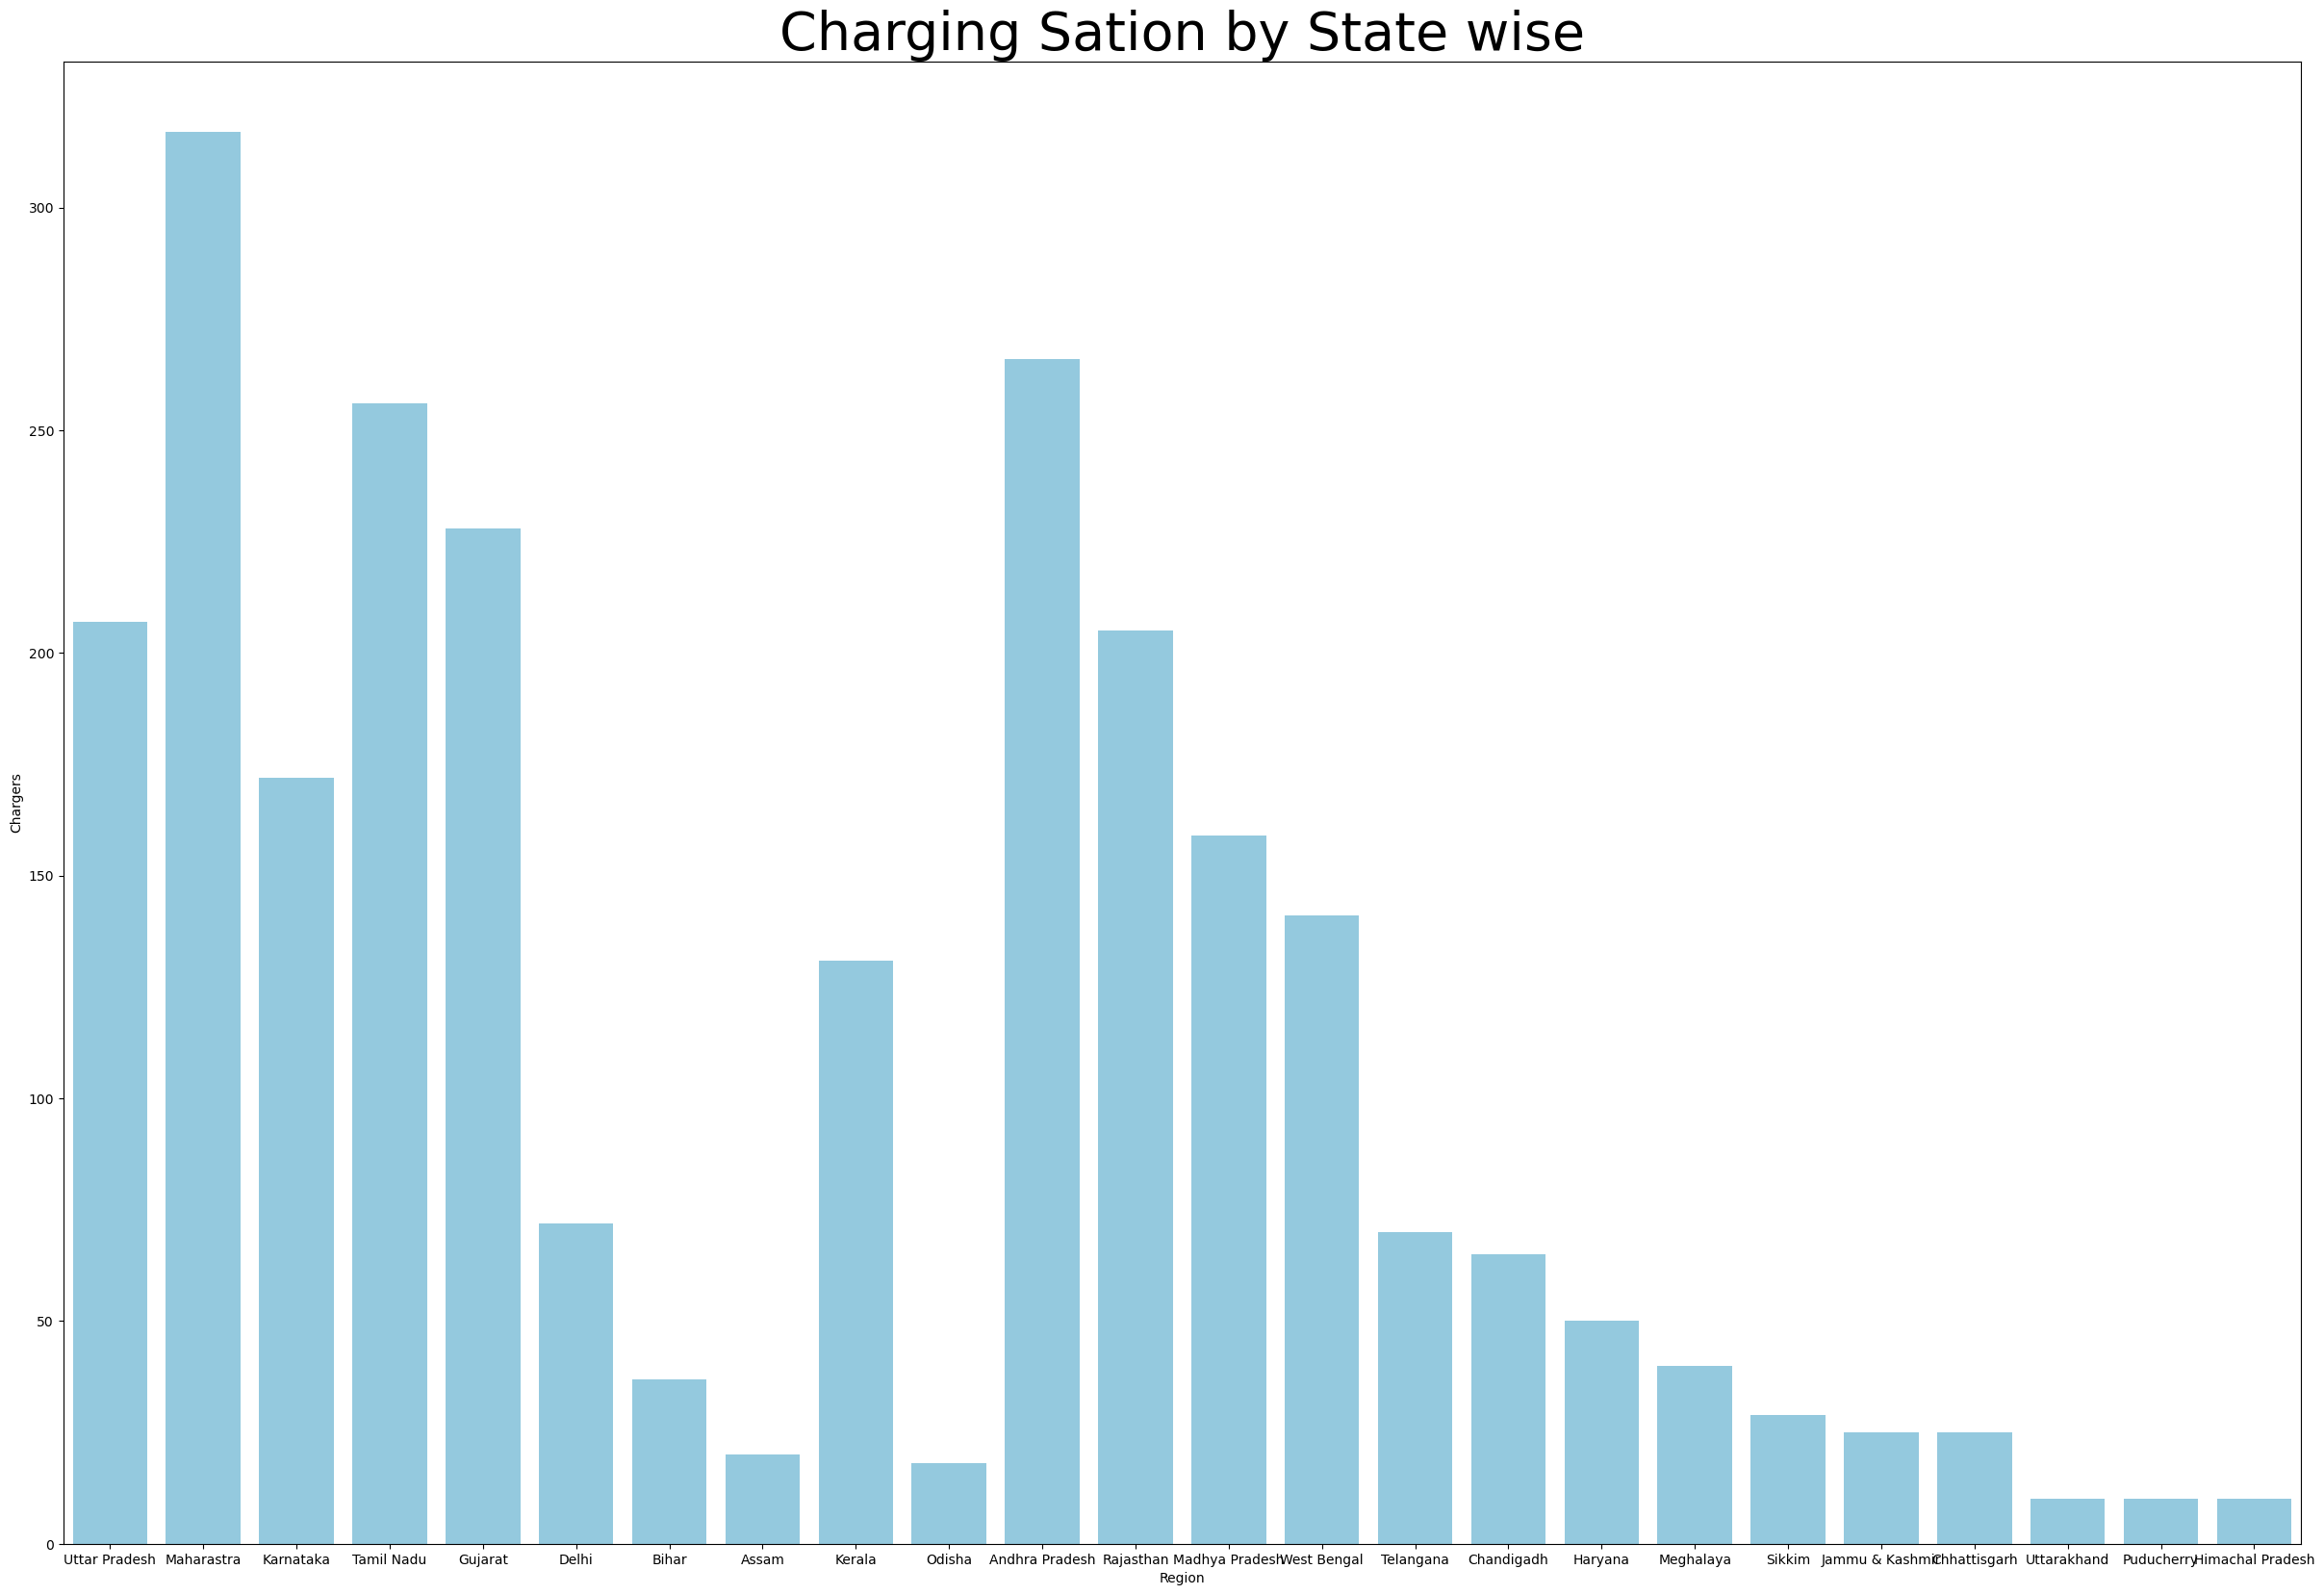

In [41]:
plt.figure(figsize=(30,20))
sns.barplot(charging_station['Region'], x=charging_station['Region'],
    y=charging_station['Chargers'],color= 'skyblue')
plt.title('Charging Sation by State wise',fontsize = 40)

We noticed the most numbers of Charging stations are present in maharashtra

Text(0.5, 1.0, 'Type of Vehicle')

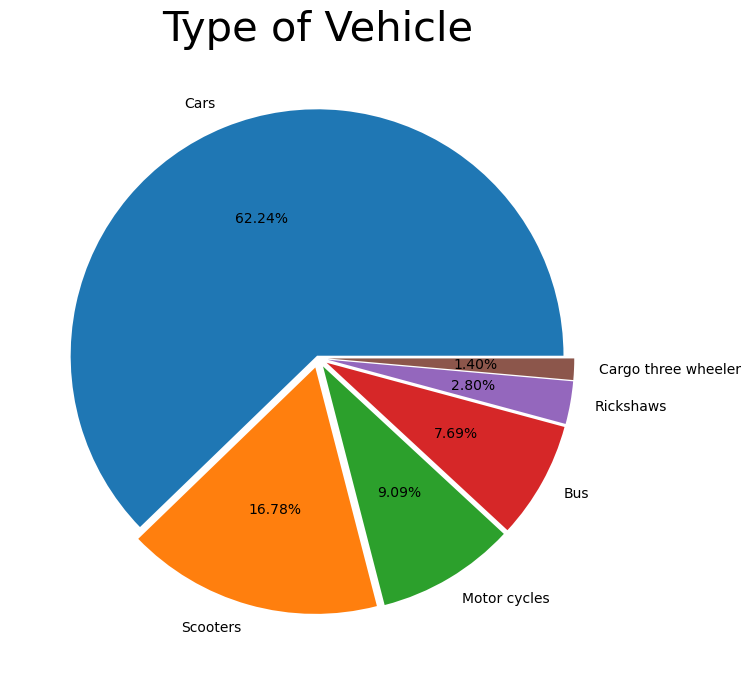

In [42]:
plt.figure(figsize=(25,8))
explode = [0.01,0.04,0.04,0.04,0.04,0.04]
labels=['Cars','Scooters','Motor cycles','Bus','Rickshaws','Cargo three wheeler']
plt.pie(data['Type of Vehicle'].value_counts(),
        labels=labels,autopct = '%.2f%%',explode=explode)
plt.title('Type of Vehicle', fontsize = 30)

The pie chart shoes the approx percentage of electrical vehicles in india. It shows  the manufacturing market percentage of every type of vehicle. In that we can see that the market of Cars is high. A lot of EV startup companies are manufacturing or focused on only Electricals Cars. Also there is less market for Cargo and Rickshaws. A very less number of companies are focusing on Cargo and Rickshaws.

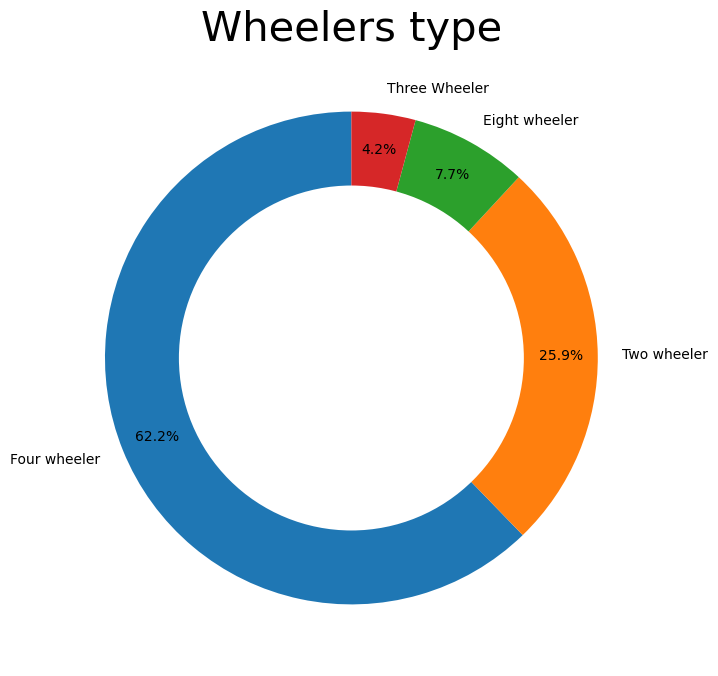

In [43]:
plt.figure(figsize=(25,8))
labels=['Four wheeler','Two wheeler','Eight wheeler','Three Wheeler']
plt.pie(data['Wheelers type'].value_counts(),labels=labels, autopct='%1.1f%%',
         startangle=90, pctdistance=0.85,)
plt.title('Wheelers type', fontsize = 30)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [45]:
final=['Top speed (km/hr)','Price (INR)', 'Full charging time (HR)','Fuel Type','Battery capacity [kWh]','Range (km/hr)',
       'Kerb weight (KG)','Fast Charging', ' Drive Type','Wheelers type',' Number of Seats', 'Type of brakes', 'Max Torque (N-M)','Income'
      ]
new_data=data.loc[:,final]
new_data

,Top speed (km/hr),Price (INR),Full charging time (HR),Fuel Type,Battery capacity [kWh],Range (km/hr),Kerb weight (KG),Fast Charging,Drive Type,Wheelers type,Number of Seats,Type of brakes,Max Torque (N-M),Income
0,85.00000,1.340000e+05,4.5,Electric,4.0,150.0,108.0,Yes,Belt Drive,Two wheeler,2.0,Disc,170.0,Medium (Millions)
1,65.00000,4.072549e+06,4.2,Electric,2.7,180.0,101.0,Yes,Hub Drive,Two wheeler,2.0,Disc,NaN,Unknown
2,100.00000,1.924990e+05,5.0,Electric,4.0,180.0,NaN,No,NaN,Two wheeler,2.0,Disc,28.0,Medium (Millions)
3,105.00000,2.074990e+05,5.0,Electric,4.0,180.0,NaN,Yes,NaN,Two wheeler,2.0,Disc,38.0,Medium (Millions)
4,100.00000,1.029990e+05,2.0,Electric,4.4,200.0,110.0,Yes,Belt Drive,Two wheeler,2.0,Disc,NaN,Medium (Millions)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,129.76259,4.072549e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
183,129.76259,4.072549e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
184,129.76259,4.072549e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
185,129.76259,4.072549e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown


Text(0, 0.5, 'Counts')

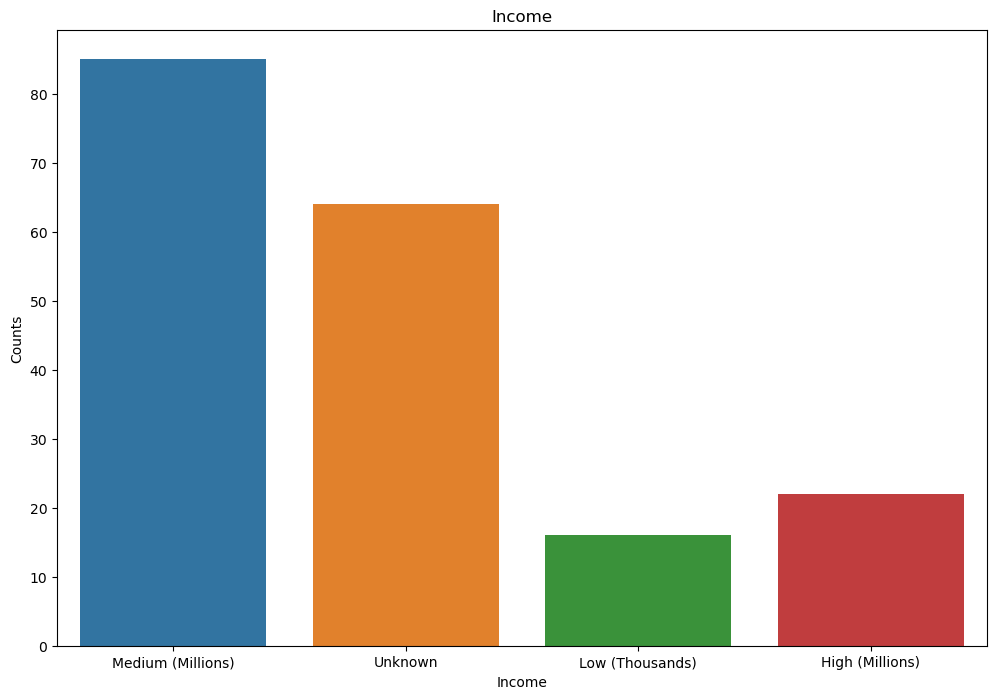

In [47]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Income', data=new_data)
plt.title('Income')
plt.ylabel('Counts')

Above figure Shows a plot of information about Income feature. we categorized Income features in three different types as, first in Low means the price of EV is in thousands rupees (Less than 1 lakhs), second in Medium means the price of EV is in lakhs (Between 1 lakh to 1 crore) and Third in High means the price of EV is in crore (Greater than 1 crore). As from countplot we can conclude that the maximum EV’s price is in lakhs (Medium) and the one whose income is not clear have been categorized in unknown.

In [48]:
sales.head()

,Years,Two Wheeler,Three Wheeler,Four Wheeler
0,Year 2020,152000,140683,168300
1,Year 2021,143837,88378,134821
2,Year 2022,231338,384215,429217


<Axes: xlabel='Price (INR)', ylabel='Full charging time (HR)'>

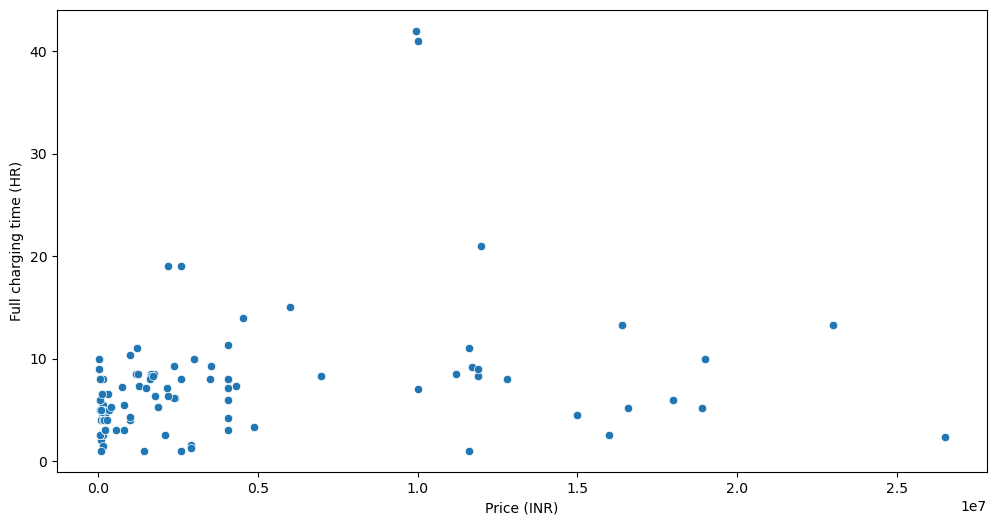

In [49]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Price (INR)',y='Full charging time (HR)',data=data)

<Axes: xlabel='Price (INR)', ylabel='Top speed (km/hr)'>

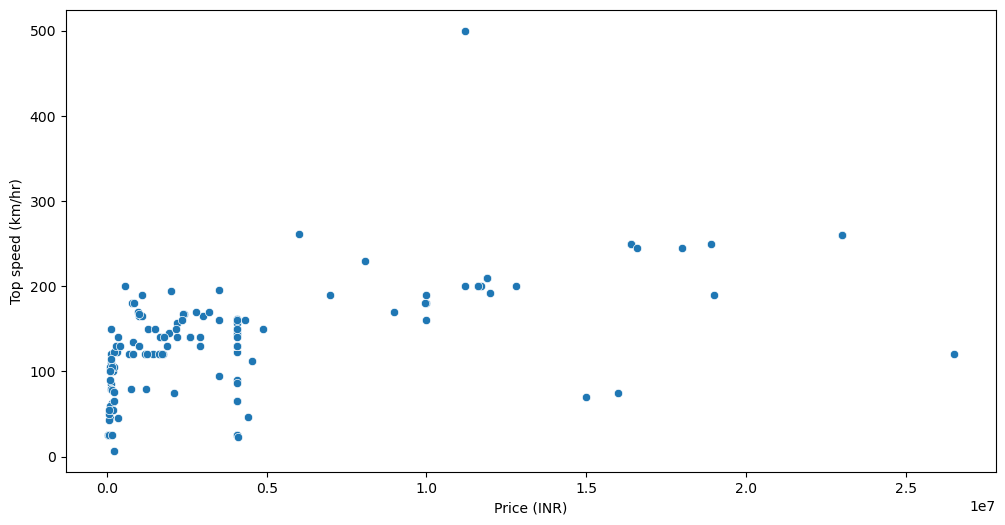

In [50]:
#Relation between price and top speed
plt.figure(figsize=(12,6))
sns.scatterplot(x='Price (INR)',y='Top speed (km/hr)',data=new_data)

As from this scatter plot ,we can conclude that if the Top Speed of EV is increasing then the Price of EV is also increasing.

Both are directly proportional to each other.

<Axes: xlabel='Battery capacity [kWh]', ylabel='Top speed (km/hr)'>

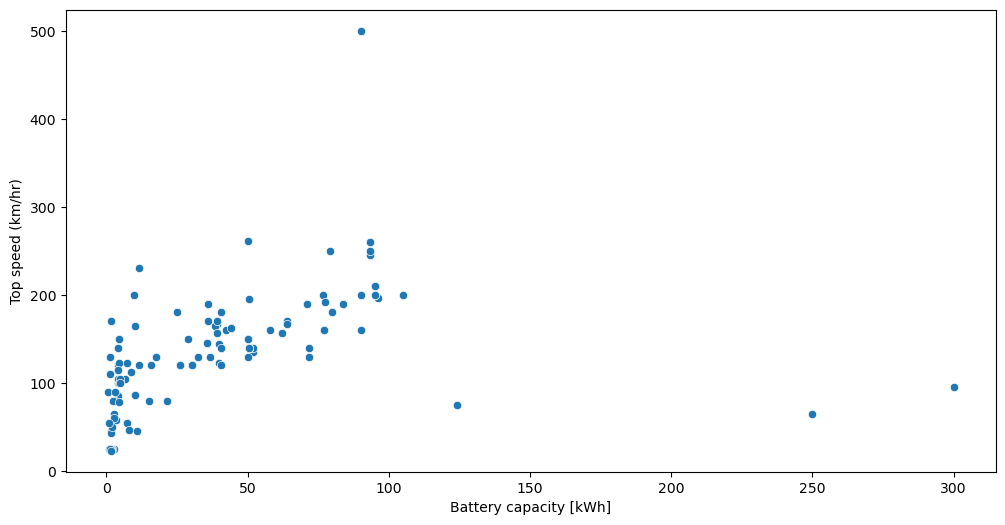

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Battery capacity [kWh]',y='Top speed (km/hr)',data=new_data)

Text(0.5, 1.0, 'Income VS Top Speed')

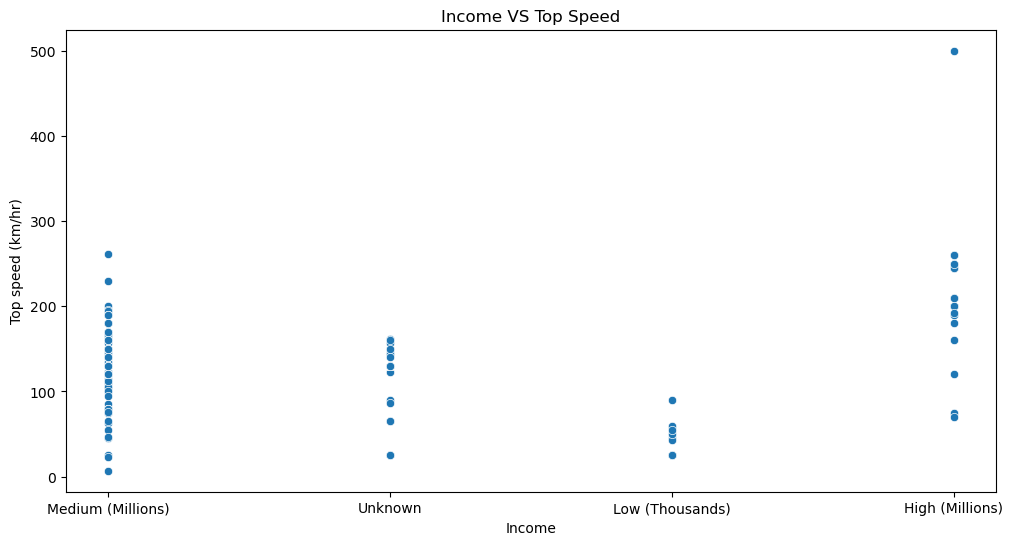

In [52]:
#relation between top speed and income
plt.figure(figsize=(12,6))
sns.scatterplot(x='Income',y='Top speed (km/hr)',data=new_data)
plt.title('Income VS Top Speed')

We can see that if the price of EV in Low (thousands) then your top speed lies within 0-110 km/hr. As the price increases your vehicle's top speed also increases

In [53]:
new_data.isna().sum()

Top speed (km/hr)           0
Price (INR)                 0
Full charging time (HR)    75
Fuel Type                  44
Battery capacity [kWh]     57
Range (km/hr)              47
Kerb weight (KG)           64
Fast Charging              44
 Drive Type                72
Wheelers type              44
 Number of Seats           44
Type of brakes             61
Max Torque (N-M)           68
Income                      0
dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder

features =['Wheelers type', ' Drive Type', 'Type of brakes','Fast Charging','Income','Fuel Type' ]

for i in features:
     new_data[i] =LabelEncoder().fit_transform(new_data[i])
new_data

,Top speed (km/hr),Price (INR),Full charging time (HR),Fuel Type,Battery capacity [kWh],Range (km/hr),Kerb weight (KG),Fast Charging,Drive Type,Wheelers type,Number of Seats,Type of brakes,Max Torque (N-M),Income
0,85.00000,1.340000e+05,4.5,0,4.0,150.0,108.0,1,11,3,2.0,1,170.0,2
1,65.00000,4.072549e+06,4.2,0,2.7,180.0,101.0,1,15,3,2.0,1,NaN,3
2,100.00000,1.924990e+05,5.0,0,4.0,180.0,NaN,0,22,3,2.0,1,28.0,2
3,105.00000,2.074990e+05,5.0,0,4.0,180.0,NaN,1,22,3,2.0,1,38.0,2
4,100.00000,1.029990e+05,2.0,0,4.4,200.0,110.0,1,11,3,2.0,1,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,129.76259,4.072549e+06,NaN,2,NaN,NaN,NaN,2,22,4,NaN,5,NaN,3
183,129.76259,4.072549e+06,NaN,2,NaN,NaN,NaN,2,22,4,NaN,5,NaN,3
184,129.76259,4.072549e+06,NaN,2,NaN,NaN,NaN,2,22,4,NaN,5,NaN,3
185,129.76259,4.072549e+06,NaN,2,NaN,NaN,NaN,2,22,4,NaN,5,NaN,3


array([[<Axes: title={'center': 'Price (INR)'}>,
        <Axes: title={'center': 'Top speed (km/hr)'}>,
        <Axes: title={'center': 'Battery capacity [kWh]'}>],
       [<Axes: title={'center': 'Kerb weight (KG)'}>,
        <Axes: title={'center': 'Range (km/hr)'}>,
        <Axes: title={'center': 'boot space (L)'}>],
       [<Axes: title={'center': 'Max Torque (N-M)'}>,
        <Axes: title={'center': ' Number of Seats'}>, <Axes: >]],
      dtype=object)

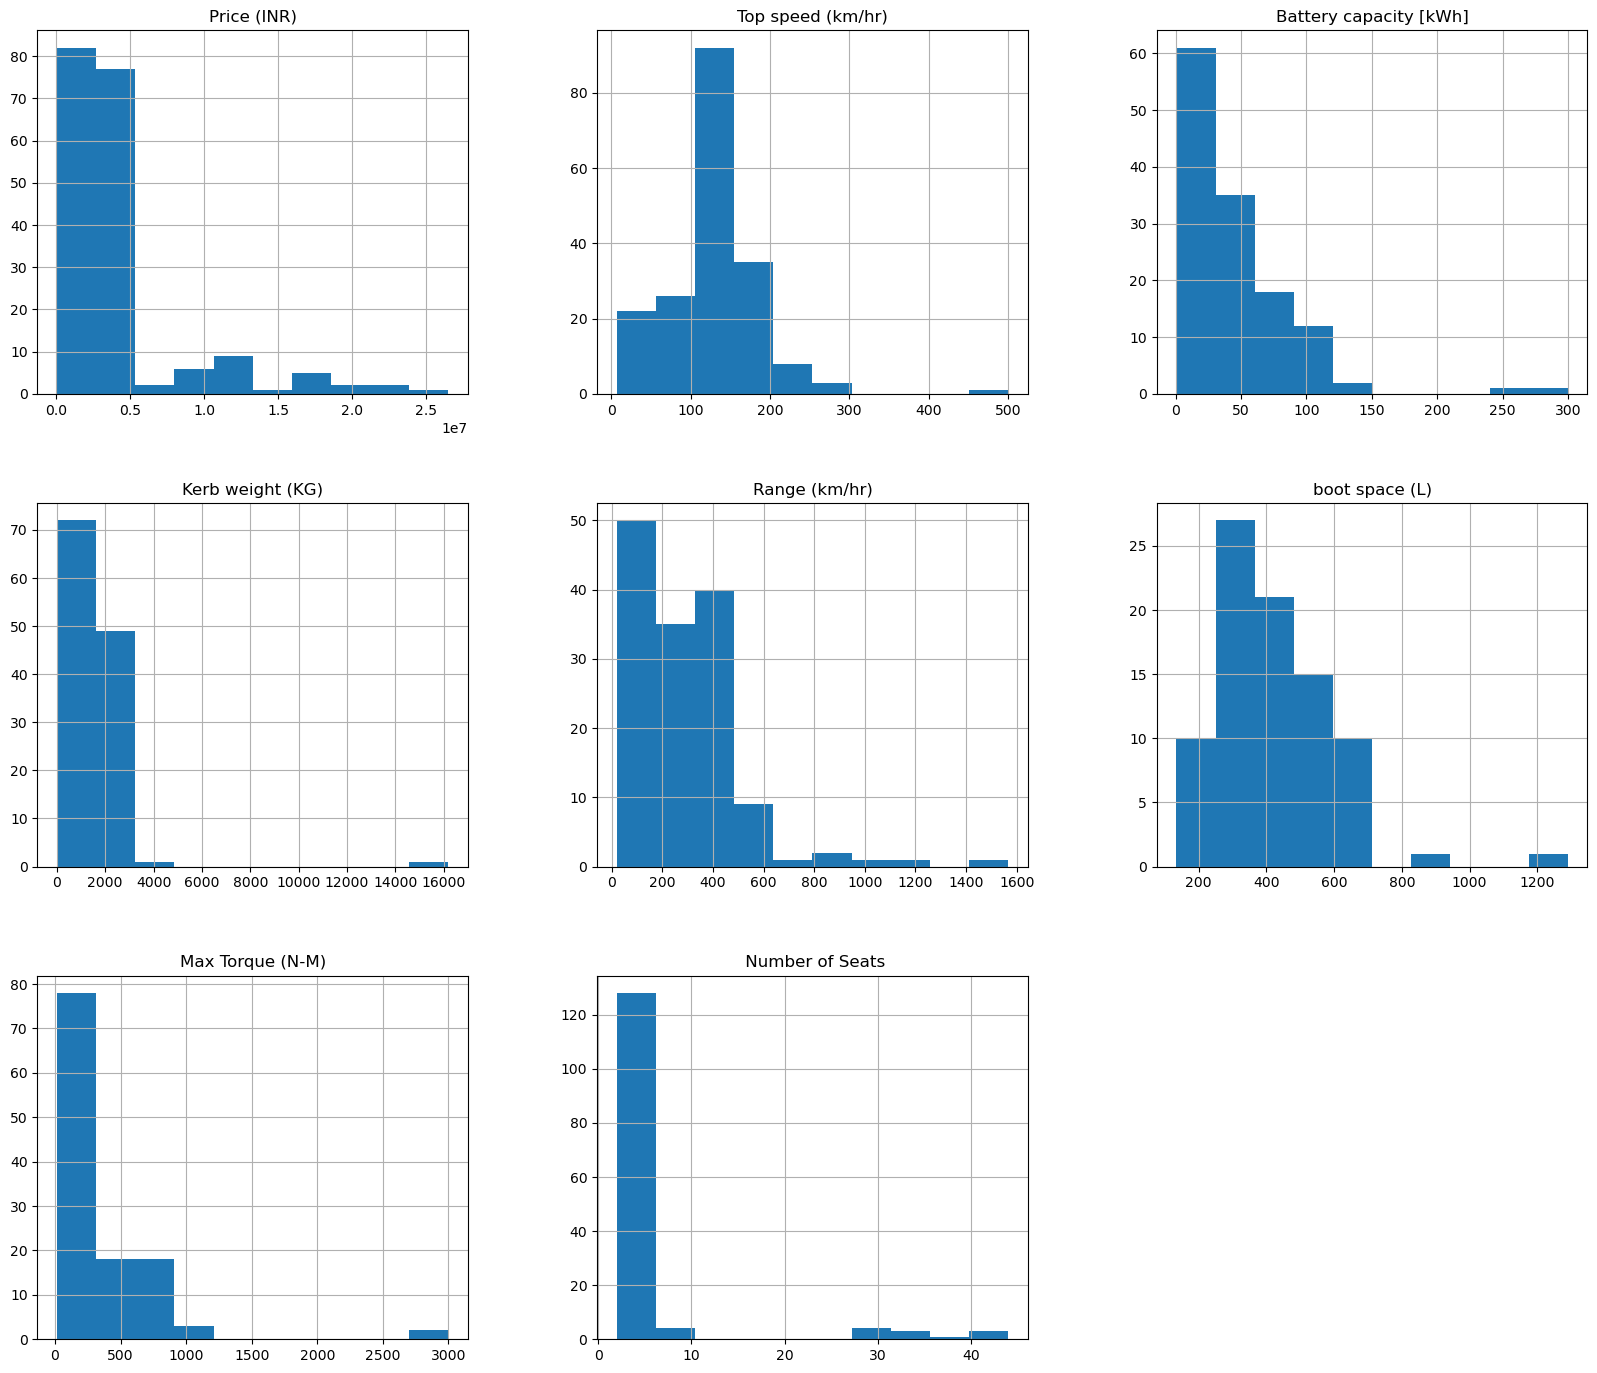

In [55]:
#Histogram 
plt.rcParams['figure.figsize']=(20,17)
data.hist(['Price (INR)','Top speed (km/hr)','Battery capacity [kWh]','Kerb weight (KG)','Range (km/hr)',
           'boot space (L)','Max Torque (N-M)',' Number of Seats'])


In the above figure we plot histograms of every single feature. As from that we can see that mostly Price ranges between thousands to lakhs. In Top speed maximum average value is around 150km/hr, same as for Battery capacity ranges around 0-50Kwh. As a Kerb weight it averages at 0-2000kg. Most EVhas Range between 0-100km/hr. For boot space we can conclude that most EVs have 300 liter boot space. Also for maximum Torque and number of Seats, we can see torque lies between 0-400 and average EVs have 5 seats.

<Axes: >

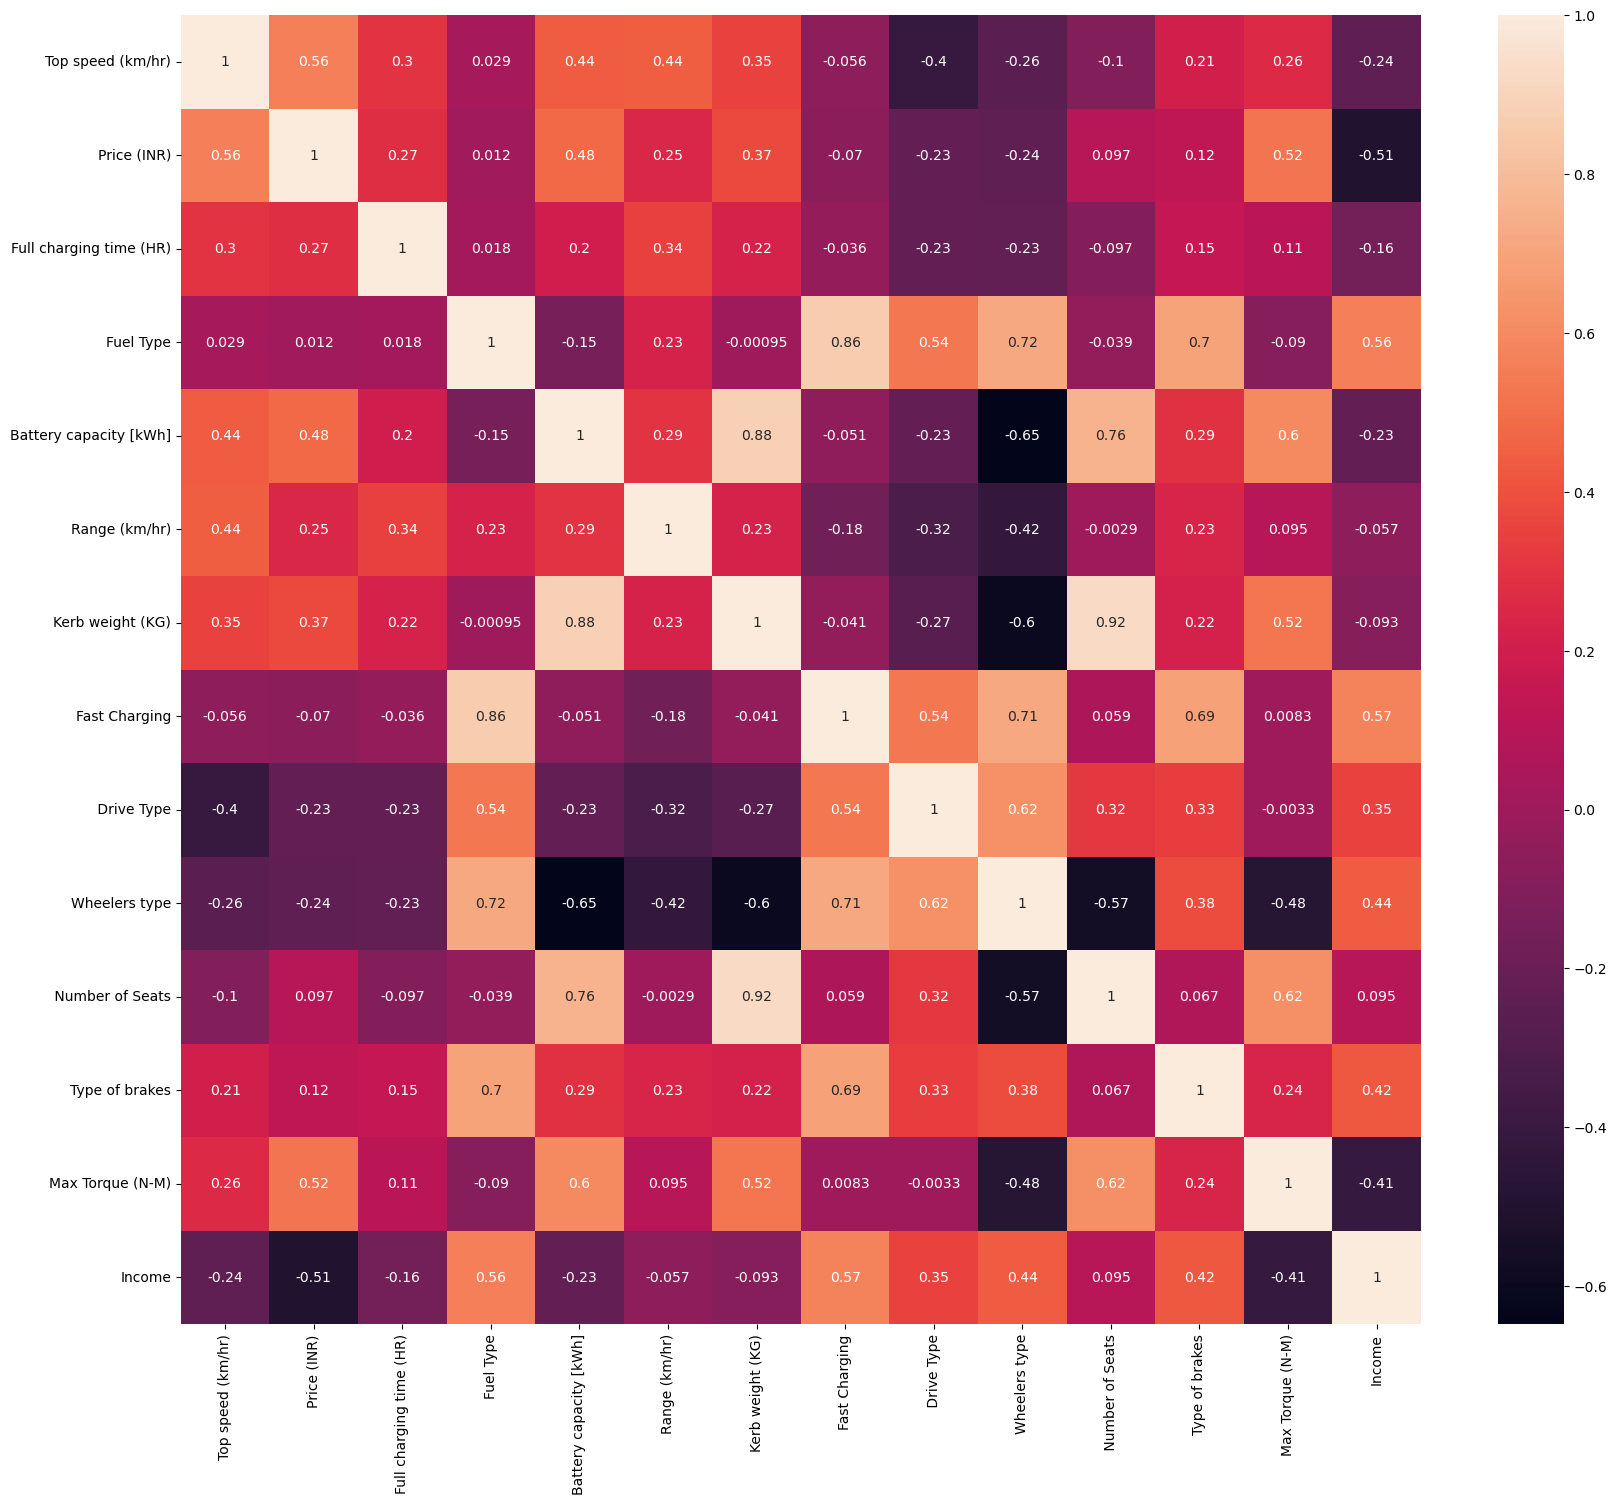

In [56]:
#Heatmap for chechking correlations
sns.heatmap(new_data.corr(),annot=True)

Above figure shows the correlation between every individual variable. We can see that Kerb weight and Battery capacity have the highest correlation. Meaning if we want more battery capacity our EV weight will increase.

In [57]:
new_data.isna().sum()

Top speed (km/hr)           0
Price (INR)                 0
Full charging time (HR)    75
Fuel Type                   0
Battery capacity [kWh]     57
Range (km/hr)              47
Kerb weight (KG)           64
Fast Charging               0
 Drive Type                 0
Wheelers type               0
 Number of Seats           44
Type of brakes              0
Max Torque (N-M)           68
Income                      0
dtype: int64

In [58]:
x = new_data.loc[:,final].values
x


array([[8.50000000e+01, 1.34000000e+05, 4.50000000e+00, ...,
        1.00000000e+00, 1.70000000e+02, 2.00000000e+00],
       [6.50000000e+01, 4.07254919e+06, 4.20000000e+00, ...,
        1.00000000e+00,            nan, 3.00000000e+00],
       [1.00000000e+02, 1.92499000e+05, 5.00000000e+00, ...,
        1.00000000e+00, 2.80000000e+01, 2.00000000e+00],
       ...,
       [1.29762590e+02, 4.07254919e+06,            nan, ...,
        5.00000000e+00,            nan, 3.00000000e+00],
       [1.29762590e+02, 4.07254919e+06,            nan, ...,
        5.00000000e+00,            nan, 3.00000000e+00],
       [1.29762590e+02, 4.07254919e+06,            nan, ...,
        5.00000000e+00,            nan, 3.00000000e+00]])

# Principal Component analysis

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd

imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# Perform PCA
pca = PCA(n_components=13)
pc = pca.fit_transform(x_imputed)
names = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13']
pf = pd.DataFrame(data=pc, columns=names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13
0,-3.938549e+06,-1022.229588,-5.933027,-81.555376,-2.411414,-2.302332,-5.945330,3.762526,-0.990695,0.078055,-1.128501,-0.419777,-0.372173
1,-1.370429e-01,-1408.002455,41.903409,-84.124831,-47.034871,-8.789287,-4.371429,0.891283,-2.178419,0.307917,-1.216778,1.079221,-0.633964
2,-3.880050e+06,366.473614,-186.109665,-95.151052,-1.549908,-22.306413,3.246911,-4.351186,-2.175621,3.046269,0.122084,0.253028,-0.520931
3,-3.865050e+06,365.303232,-176.722104,-94.186070,3.421353,-23.044153,3.507378,-4.393942,-2.210719,2.893153,-0.066336,0.188631,-0.308886
4,-3.969550e+06,-1011.426198,167.771006,-18.899845,9.560219,-9.855106,-5.718231,3.819920,-3.774853,0.271873,-1.213954,-0.355668,-0.407941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,-2.340581e-06,-0.004681,0.023551,-0.045545,-0.251175,0.061200,5.194076,-5.283972,-0.583185,-1.663031,-0.471299,-0.093206,0.053318
183,-2.340581e-06,-0.004681,0.023551,-0.045545,-0.251175,0.061200,5.194076,-5.283972,-0.583185,-1.663031,-0.471299,-0.093206,0.053318
184,-2.340581e-06,-0.004681,0.023551,-0.045545,-0.251175,0.061200,5.194076,-5.283972,-0.583185,-1.663031,-0.471299,-0.093206,0.053318
185,-2.340581e-06,-0.004681,0.023551,-0.045545,-0.251175,0.061200,5.194076,-5.283972,-0.583185,-1.663031,-0.471299,-0.093206,0.053318


In [65]:
pca.explained_variance_ratio_

array([9.99999926e-01, 6.82270715e-08, 3.72250031e-09, 1.52818834e-09,
       8.91562938e-11, 1.90664302e-11, 2.11152706e-12, 1.23404600e-12,
       8.17833762e-13, 1.02727260e-13, 2.86751146e-14, 1.28940791e-14,
       4.66029128e-15])

In [66]:
loadings = pca.components_
num_pc = pca.n_features_

# K-Means clustering analysis

K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training. It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters. The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

We start by pre-processing the data and cleaning it. This essentially involves null-handling ,label encoding and dummies variables in the ordinal parameters of the data. The data is then passed into the Scikit-Learn K-Means Clustering model to obtain the elbow curve for the ideal number of clusters. Using the "elbow" or "knee of a curve" as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost.

In [70]:
data['Range (km/hr)'].shape

(187,)

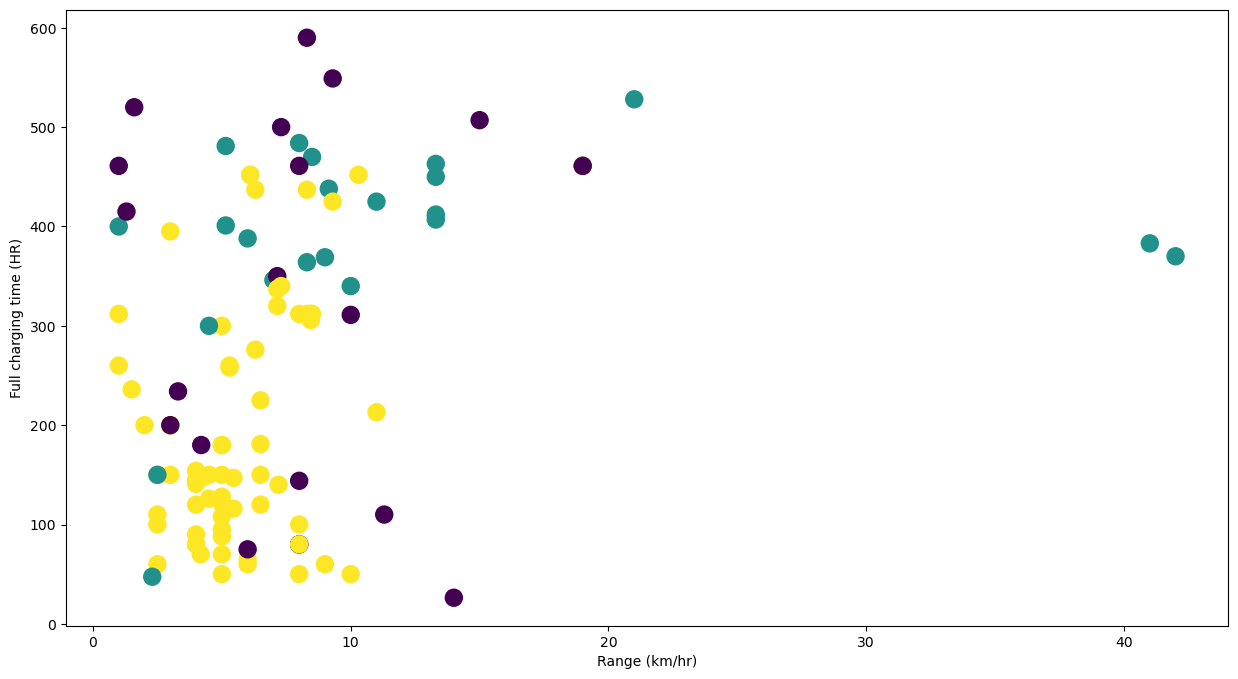

In [75]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(new_data)
new_data.dropna(inplace=True)
data_predict.shape
plt.figure(figsize=(15,8))
plt.scatter( y ='Range (km/hr)' ,x = 'Full charging time (HR)', data = data , c = data_predict , s =150,cmap='viridis' )
plt.xlabel('Range (km/hr)')
plt.ylabel('Full charging time (HR)')
plt.show()

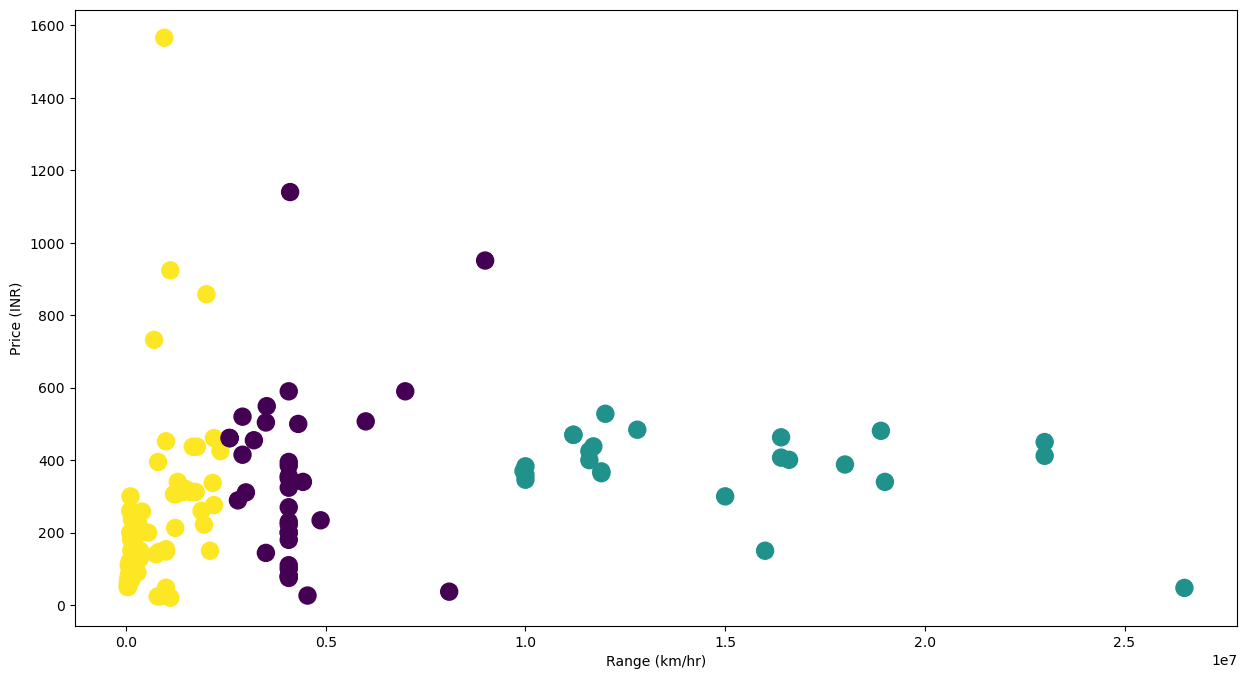

In [76]:
plt.figure(figsize=(15,8))
plt.scatter( y ='Range (km/hr)' ,x = 'Price (INR)', data = data , c = data_predict , s =150,cmap='viridis' )
plt.xlabel('Range (km/hr)')
plt.ylabel('Price (INR)')
plt.show()

In [84]:
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(x_imputed)
data['cluster_num'] = kmeans.labels_
print(kmeans.labels_)
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) 

[2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 2 2 2 2 2 2 2 0 2 1 1 0 1 1 2 0 2 2 2 2 1 0 0 0 0 0 2 2 2 2 2 2 2 0 1
 1 1 1 1 1 1 1 0 0 0 2 0 0 1 0 0 2 2 0 0 0 2 0 2 2 1 1 1 1 2 0 2 2 2 2 2 0
 0 0 0 0 1 1 1 0 1 0 2 0 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
616838637304358.9
3
[[1.30233432e+02 4.10210198e+06 7.56263866e+00 1.09411765e+00
  4.70157466e+01 3.20944302e+02 1.79714242e+03 1.49411765e+00
  1.69647059e+01 2.58823529e+00 7.60814480e+00 3.80000000e+00
  3.27670331e+02 2.75294118e+00]
 [2.09875000e+02 1.47770833e+07 1.12266592e+01 4.16666667e-02
  8.24898077e+01 3.85227083e+02 2.41704776e+03 8.75000000e-01
  1.00833333e+01 9.16666667e-01 7.37500000e+00 2.58333333e+00
  7.72125000e+02 1.66666667e-01]
 [1.04599520e+02 7.46641410e+05 5.91325893e+00 1.02564103e-01
  2.25302959e+01 2.34474615e+02 9.09323119e+02 9.48717949e-01
  1.48461538e+01 1.87179487e+00 5.115

In [85]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 85, 2: 78, 1: 24})

In [86]:
kmeans.cluster_centers_[:,1]

array([ 4102101.976088  , 14777083.33333333,   746641.4102564 ])

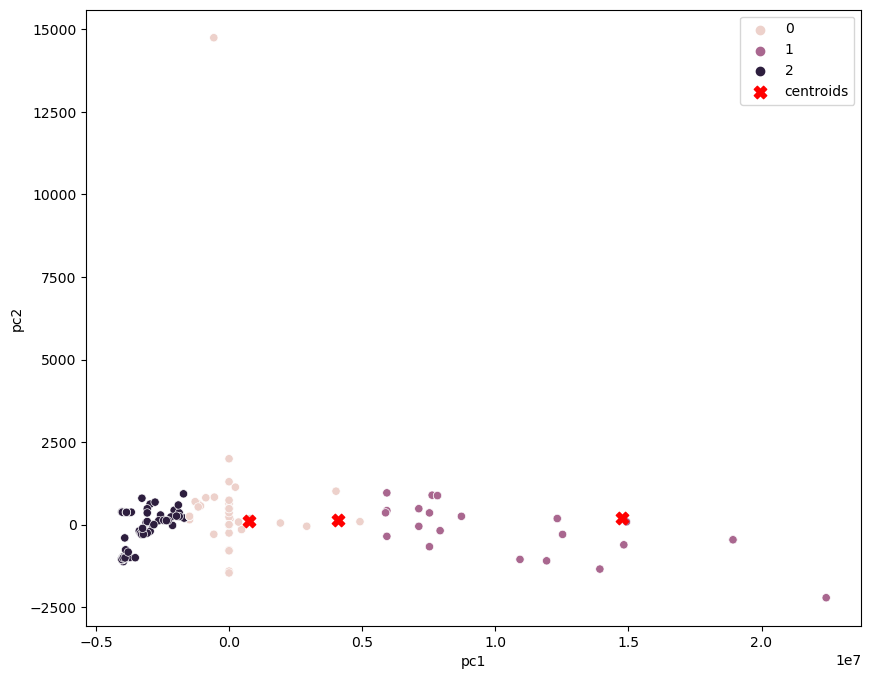

In [87]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()

In [88]:
data['Fuel Type']

0      Electric
1      Electric
2      Electric
3      Electric
4      Electric
         ...   
182         NaN
183         NaN
184         NaN
185         NaN
186         NaN
Name: Fuel Type, Length: 187, dtype: object

In [89]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(data['cluster_num'],data['Fuel Type'])
crosstab1 = crosstab[['Electric','Hybrid']]
crosstab1 

Fuel Type,Electric,Hybrid
cluster_num,,
0,36,5
1,23,1
2,70,8


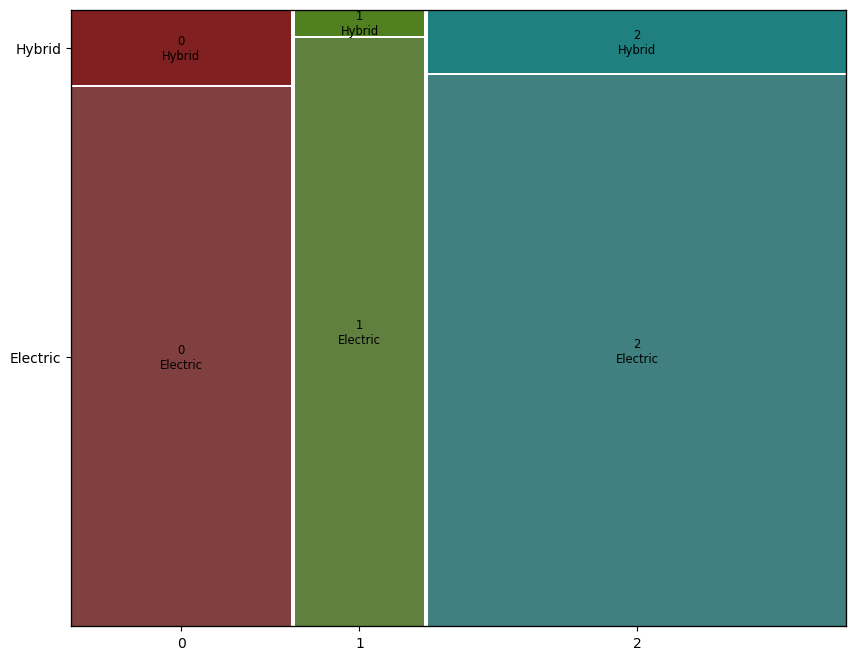

In [90]:
plt.rcParams['figure.figsize'] = (10,8)
mosaic(crosstab1.stack())
plt.show()

In [91]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(data['cluster_num'],data['Type of Vehicle'])
#Reordering cols
crosstab2 = crosstab[['Motor cycles', 'Scooters', 'Rickshaws', 'Cargo three wheeler',
       'Cars', 'Bus']]
crosstab2 

Type of Vehicle,Motor cycles,Scooters,Rickshaws,Cargo three wheeler,Cars,Bus
cluster_num,,,,,,
0,2,1,2,0,31,5
1,0,0,0,0,22,2
2,11,23,2,2,36,4


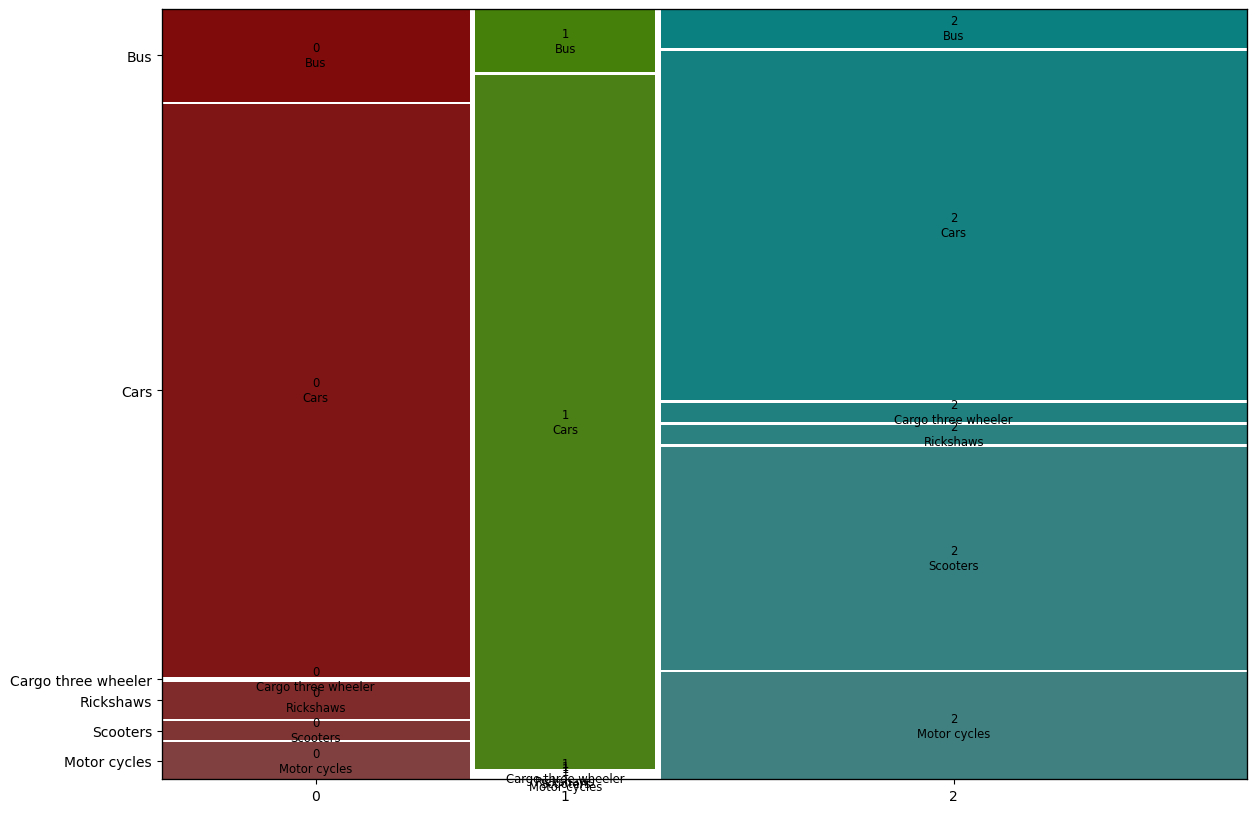

In [92]:
plt.rcParams['figure.figsize'] = (14,10)
mosaic(crosstab2.stack())
plt.show()

In [93]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(data['cluster_num'],data[' Number of Seats'])
#Reordering cols
crosstab3 = crosstab[[ 2,  4,  6,  5,  7, 44, 30, 31, 40, 35, 39, 43]]
crosstab3 

Number of Seats,2.0,4.0,6.0,5.0,7.0,44.0,30.0,31.0,40.0,35.0,39.0,43.0
cluster_num,,,,,,,,,,,,
0,3,1,2,28,2,1,1,1,0,1,0,1
1,0,3,0,19,0,0,0,1,0,0,1,0
2,36,8,0,28,2,0,0,1,1,2,0,0


In [94]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(data['cluster_num'],data['Manufacturing'])
#Reordering cols
crosstab4 = crosstab[['Revolt Motors', 'Tork Motors', 'Kabira Mobility',
       'Kabira Mobility KM 4000', 'SVM Prana', 'Earth Energy ',
       ' Earth Energy', 'Ultraviolette Automotive', 'Emflux Motors',
       'Ather Energy', 'Bajaj ', 'Simple Energy', 'Hero Electric',
       'Okinawa Praise', 'Yakuza Rubie', 'Lactrix Motors', 'Evolet Pony',
       'Omjay Eeve', 'Battre loev', 'BattRE Electric', 'PURE EV ',
       'Ampere', 'Ola', 'TVS', 'Amo Mobility', 'Lectrix EV',
       'Entice Impex', 'Lohia', 'Mahindra ', 'Kerala Automobiles',
       'Omega Seiki Mobility', 'Ele ', 'Tata', 'MG ZS', 'Hyundai',
       'Jaguar', 'Audi ', 'E6', 'Mercedes-Benz', 'BMW ', 'Mahindra',
       'Mercedes Benz', 'Pravaig Dynamics', 'MG', 'Toyota', 'Honda',
       'MG ', 'Maruti Suzuki', 'Maruti Suzuki ', 'Toyota ', 'Volvo',
       'BMW', 'Audi', 'Citroen', 'Kia', 'MIni', 'Nissan', 'Opel',
       'Peugeot', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Volkswagen',
       'Citroën', 'BYD', 'Tesla', 'Ashok Leyland', 'JBM Auto Limited\xa0',
       'Tata Motors', 'Olectra Greentech Limited\xa0',
       'Deccan Auto Limited\xa0\xa0', 'Eicher Motors Limited\xa0']]
crosstab4 

Manufacturing,Revolt Motors,Tork Motors,Kabira Mobility,Kabira Mobility KM 4000,SVM Prana,Earth Energy,Earth Energy,Ultraviolette Automotive,Emflux Motors,Ather Energy,...,Volkswagen,Citroën,BYD,Tesla,Ashok Leyland,JBM Auto Limited,Tata Motors,Olectra Greentech Limited,Deccan Auto Limited,Eicher Motors Limited
cluster_num,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,1,0,0,0,...,2,1,1,1,1,1,1,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,1,2,2,1,2,1,0,1,1,2,...,2,0,0,0,0,0,4,0,0,0


In [97]:
data['Fuel Type']= LabelEncoder().fit_transform(data['Fuel Type'])
Fuel_Type = data.groupby('cluster_num')['Fuel Type'].mean()
Fuel_Type = Fuel_Type.to_frame().reset_index()
Fuel_Type


,cluster_num,Fuel Type
0,0,1.094118
1,1,0.041667
2,2,0.102564


In [98]:
data['Type of Vehicle']= LabelEncoder().fit_transform(data['Type of Vehicle'])
Type_of_Vehicle = data.groupby('cluster_num')['Type of Vehicle'].mean()
Type_of_Vehicle = Type_of_Vehicle.to_frame().reset_index()
Type_of_Vehicle

,cluster_num,Type of Vehicle
0,0,4.058824
1,1,1.833333
2,2,2.948718


In [99]:
data[' Number of Seats']= LabelEncoder().fit_transform(data[' Number of Seats'])
Number_of_Seats= data.groupby('cluster_num')[' Number of Seats'].mean()
Number_of_Seats = Number_of_Seats.to_frame().reset_index()
Number_of_Seats

,cluster_num,Number of Seats
0,0,7.505882
1,1,2.291667
2,2,1.294872


In [100]:
data['Income']= LabelEncoder().fit_transform(data['Income'])
Income= data.groupby('cluster_num')['Income'].mean()
Income = Income.to_frame().reset_index()
Income

,cluster_num,Income
0,0,2.752941
1,1,0.166667
2,2,1.794872


In [101]:
data['Full charging time (HR)']

0      4.5
1      4.2
2      5.0
3      5.0
4      2.0
      ... 
182    NaN
183    NaN
184    NaN
185    NaN
186    NaN
Name: Full charging time (HR), Length: 187, dtype: float64

In [102]:
Full_charging_time=data.groupby('cluster_num')['Full charging time (HR)'].mean()
Full_charging_time=Full_charging_time.to_frame().reset_index()

Full_charging_time

,cluster_num,Full charging time (HR)
0,0,8.226190
1,1,11.579545
2,2,5.726522


In [103]:
ranges=data.groupby('cluster_num')['Range (km/hr)'].mean()
ranges=ranges.to_frame().reset_index()

ranges

,cluster_num,Range (km/hr)
0,0,355.350000
1,1,385.227083
2,2,234.474615


In [104]:
segment = Income.merge(Type_of_Vehicle, on='cluster_num', how='left').merge(Fuel_Type, on='cluster_num',
how='left').merge(ranges,on='cluster_num', how='left').merge(Full_charging_time, on='cluster_num', how='left')
segment

,cluster_num,Income,Type of Vehicle,Fuel Type,Range (km/hr),Full charging time (HR)
0,0,2.752941,4.058824,1.094118,355.350000,8.226190
1,1,0.166667,1.833333,0.041667,385.227083,11.579545
2,2,1.794872,2.948718,0.102564,234.474615,5.726522


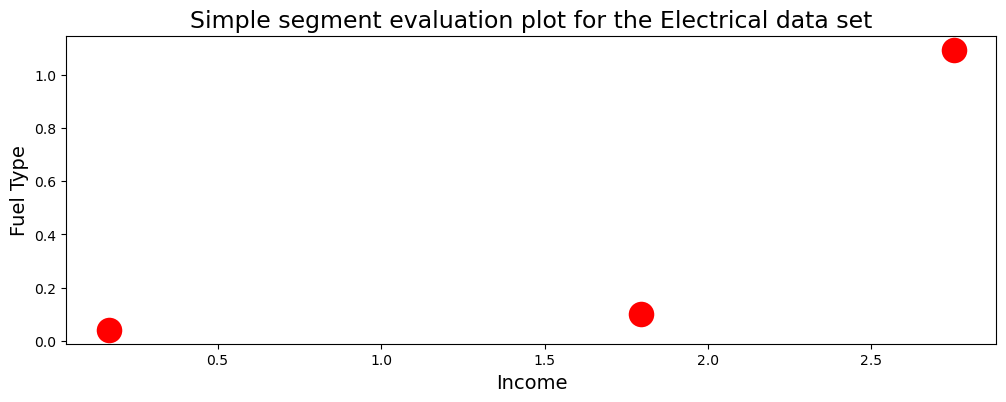

In [105]:
plt.figure(figsize = (12,4))
sns.scatterplot(x = "Income", y = "Fuel Type",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the Electrical data set",
          fontsize = 17) 
plt.xlabel("Income", fontsize = 14) 
plt.ylabel("Fuel Type", fontsize = 14) 
plt.show()

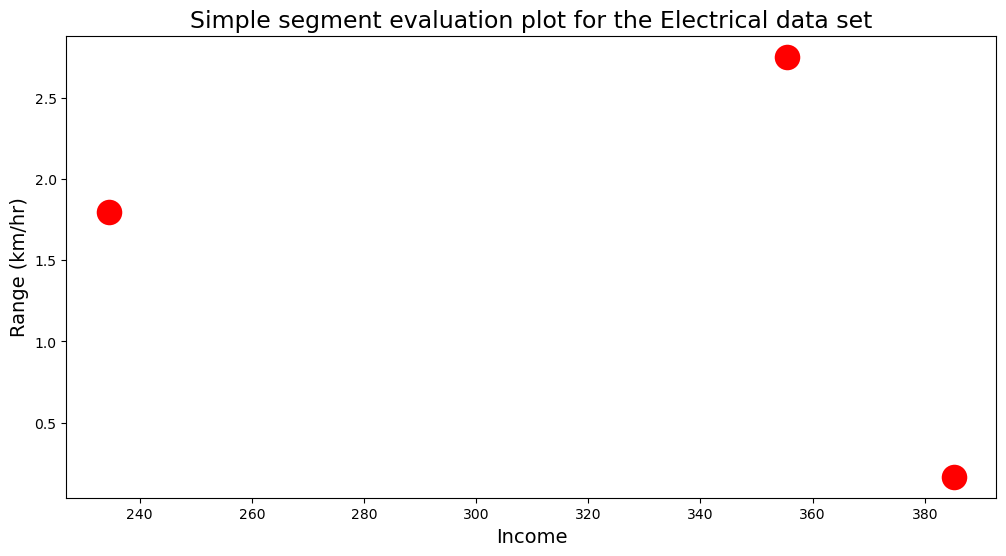

In [106]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = "Range (km/hr)", y = "Income",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the Electrical data set",
          fontsize = 17) 
plt.xlabel("Income", fontsize = 14) 
plt.ylabel("Range (km/hr)", fontsize = 14) 
plt.show()


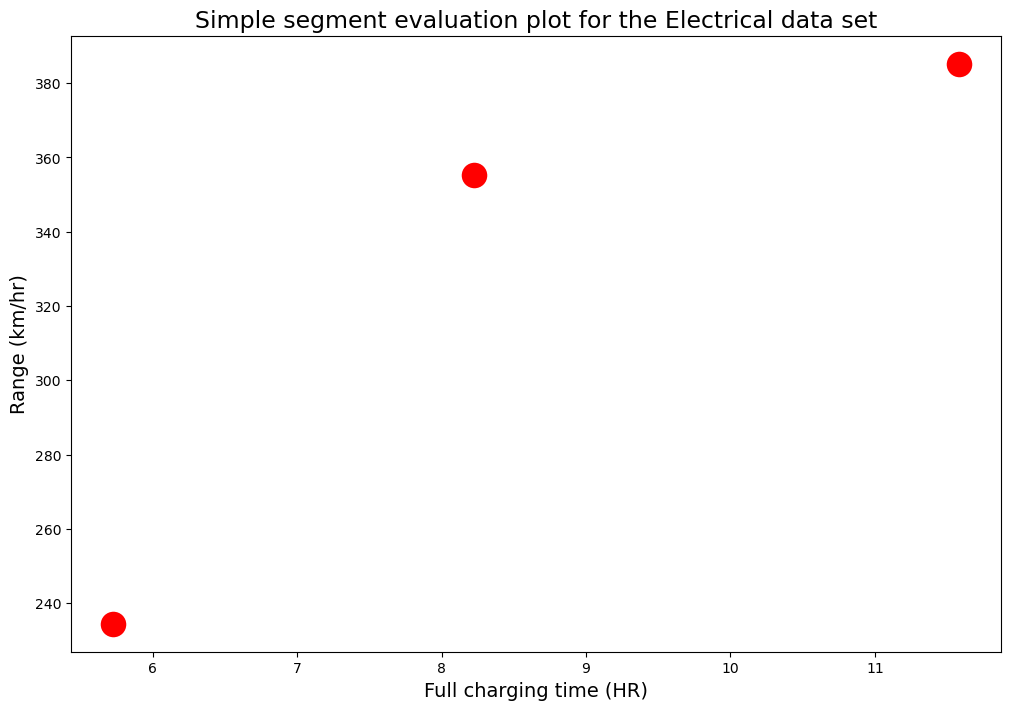

In [107]:
plt.figure(figsize = (12,8))
sns.scatterplot(x ='Full charging time (HR)' , y ="Range (km/hr)",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the Electrical data set",
          fontsize = 17) 
plt.xlabel("Full charging time (HR)", fontsize = 14) 
plt.ylabel("Range (km/hr)", fontsize = 14) 
plt.show()

# Market segmentation

Market segmentation is the process of dividing a heterogeneous market into smaller, more manageable segments with similar characteristics and behaviors. This allows businesses to target their products and marketing efforts more effectively. There are several different types of market segmentation, each based on distinct criteria. Here are some of the most common types:

3. Demographic Segmentation:
Demographic segmentation divides the market based on identifiable and quantifiable factors such as age, gender, income, education, family size, and occupation. This type of segmentation is straightforward and widely used. For example, a company may target women aged 25-34 with a specific product or message.

2. Geographic Segmentation:
Geographic segmentation categorizes the market by geographic locations, such as countries, regions, cities, climate zones, or population density. Companies often adapt their products and marketing strategies to the unique needs and preferences of customers in different geographic areas. For instance, a clothing retailer might offer winter clothing in colder regions and summer wear in warmer areas.

3. Psychographic Segmentation:
Psychographic segmentation is based on customers' lifestyles, values, interests, and behavior. This approach creates segments based on personality traits, attitudes, and psychological characteristics. Companies use psychographic data to target customers who share similar lifestyles or beliefs. An example could be marketing eco-friendly products to environmentally conscious consumers.


# What we learned

The peneteration of EV in India has Increased Significantly in the last five years as they are more efficient. In addition, growing fuel prices are further helping to boost substantial growth in the product adoption, mainly due to their extended range and efficiency.

The global Electric Vehicle Market size is projected to grow from 8,151 thousand units in 2022 to 39,208 thousand units by 2030, at a CAGR of 21.7%. Factors such as growing demand for low emission commuting and governments supporting long range, zero emission vehicles through subsidies & tax rebates have compelled the manufacturers to provide electric vehicles around the world.

Increasing investments by governments across the globe to develop EV charging stations and Hydrogen fueling stations along with incentives offered to buyers will create opportunities for OEMs to expand their revenue stream and geographical presence.

From this analysis we create different types of segments to affect consumers' purchasing decisions. Geographic segmentation is about places, cities, states that where consumers live will affect market sales. Like if a consumer lives in a rural area there may be less possibility of having charging stations and vice versa in urban areas. Now in 2022 yet we have only 1742 public charging stations available.

So if a consumer is from those states who have more available charging stations ,the probability of buying is more as compared to others who have less charging stations in their states. Demographic segmentation focuses on education level, family size, occupation, income, etc. since it is based on knowing how customers use your products and services and how much they are willing to pay for them.

That depends on consumers' education, Financial status and purpose of buying EV’s. If a customer's purpose is to buy an EV for transporting goods in different cities or states, that customer will focus on the boot space and maximum range of a vehicle. On a psychological segment some customers may go for a product which gives them satisfaction and others may go with a product who is cheaper in cost and their other factors are average